## Background Information

This notebook conducts an analysis of sales performance for the WaterCure product offered by WaterPro, an Australia-based company. We aim to understand the correlation between sales performance and environmental factors, such as temperature, and customer feedback.

- We will focus on the following key tasks:
1. Visualizing the correlation between daily and monthly sales performance and temperature.
2. Calculating and visualizing the average customer rating for each month.
3. Analyzing the distribution of customer reviews' sentiment polarity (positive, neutral, negative).
4. Generating word clouds for customer reviews based on their sentiment.

- This analysis will help WaterPro understand how external factors like temperature and customer feedback influence the sales of the WaterCure product.By combining sales data with customer feedback, we can provide a well-rounded understanding of WaterCure’s place in the market, and offer recommendations for improvement.

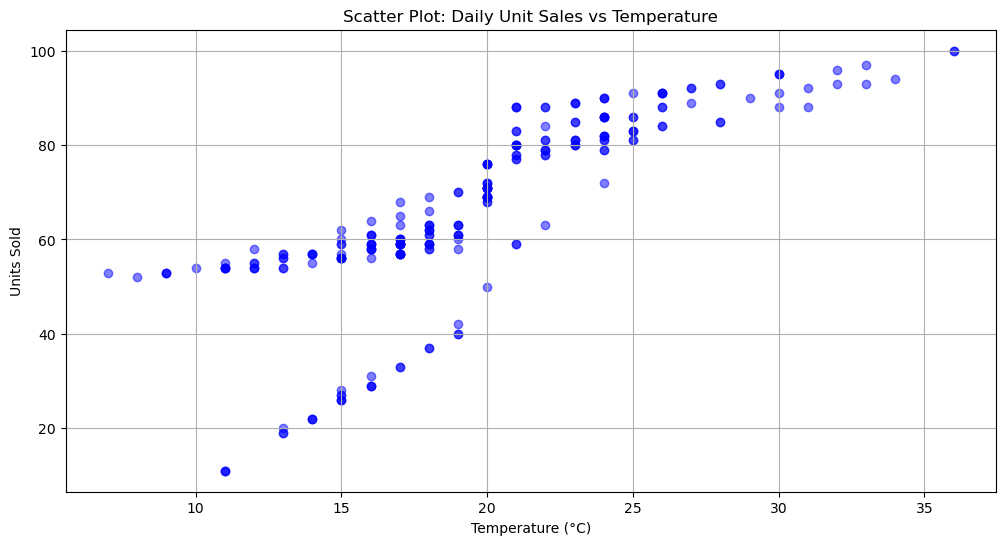

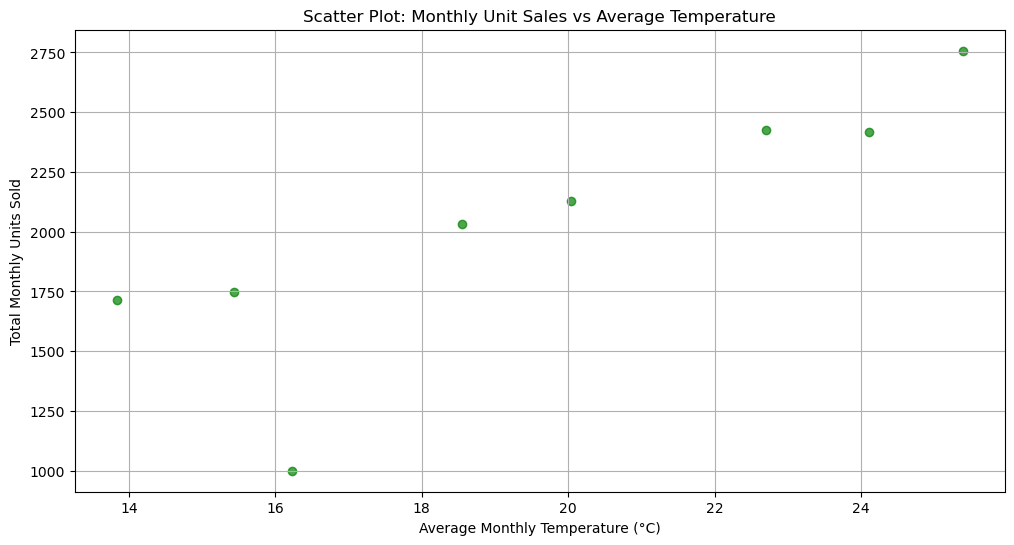

In [9]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Loading the dataset into a pandas DataFrame
data = pd.read_csv('C:\\Users\\balbi\\Downloads\\daily_sales.csv', skiprows=2)
data.rename(columns={
    "Daily Units Sold": "units_sold", 
    "Daily Unit Price": "unit_price", 
    "Daily Temperature (C)": "temperature_c"
}, inplace=True)

# Converting "Date" column to datetime and numeric columns to proper data types
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['month'] = data['Date'].dt.month

#Plotting a scatter plot for the correlation between Daily Unit Sales and Temperature
plt.figure(figsize=(12, 6))
plt.scatter(data['temperature_c'], data['units_sold'], color='blue', alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Units Sold')
plt.title('Scatter Plot: Daily Unit Sales vs Temperature')
plt.grid(True)
plt.show()

# Grouping by 'month' for aggregated daily sales and temperature
monthly_data = data.groupby('month').agg({
    'units_sold': 'sum',
    'temperature_c': 'mean'
}).reset_index()

#  Scatter plot illustrating the relationship between monthly total sales and average temperature.
plt.figure(figsize=(12, 6))
plt.scatter(monthly_data['temperature_c'], monthly_data['units_sold'], color='green', alpha=0.7)
plt.xlabel('Average Monthly Temperature (°C)')
plt.ylabel('Total Monthly Units Sold')
plt.title('Scatter Plot: Monthly Unit Sales vs Average Temperature')
plt.grid(True)
plt.show()


# Correlation Analysis Between Daily Sales and Temperature

The scatter plot visualizes the relationship between **daily units sold** and **daily temperature**. Each point in the plot represents a day, with the x-axis showing the temperature (in Celsius) and the y-axis showing the number of units sold on that day.The scatter plot also shows how daily sales relate to temperature. If there's a clear trend (up or down), it suggests temperature affects sales. If the points are scattered randomly, temperature likely has little impact on daily sales.A visible trend suggests temperature influences sales on a broader scale. If no clear pattern exists, temperature doesn't consistently affect sales, and other factors may be at play.

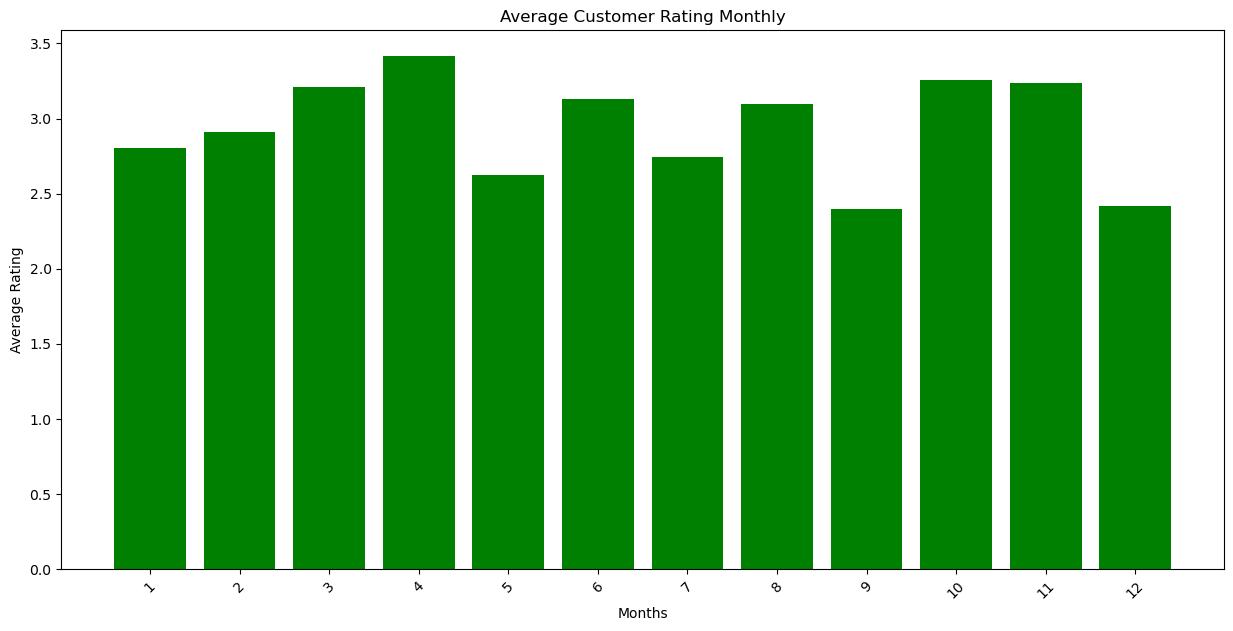

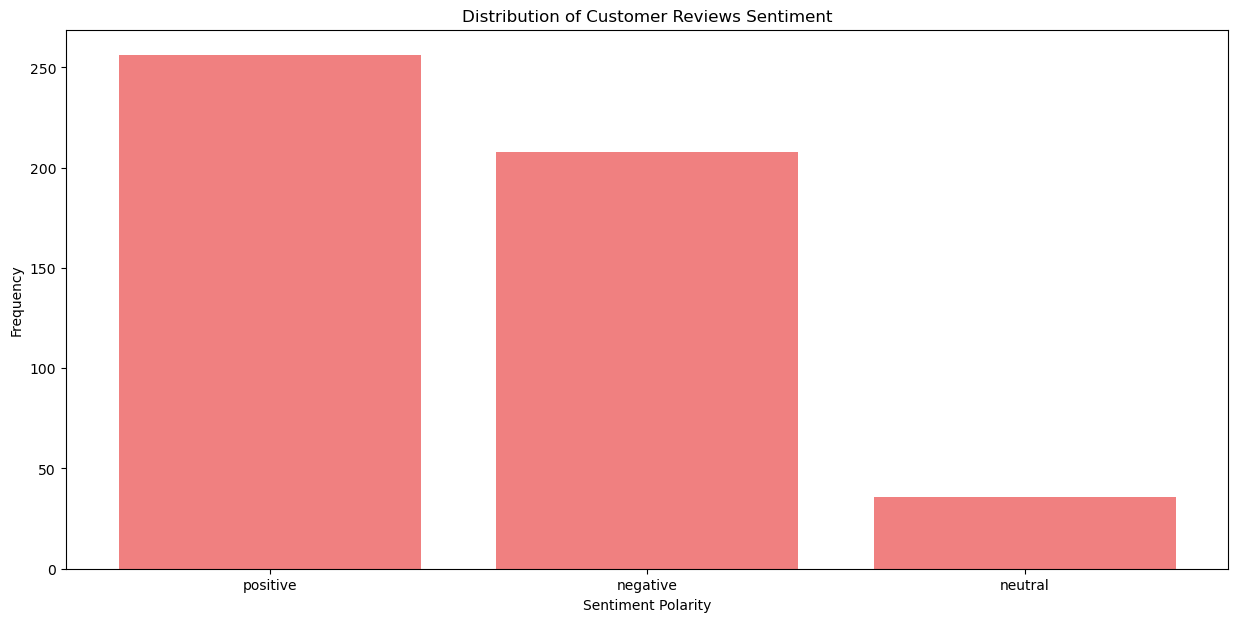

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Reading the CSV file into a DataFrame
senti_df = pd.read_csv('C:\\Users\\balbi\\Downloads\\water_product_reviews_500_actual_names (1).csv')

# Converting 'Review Date' to datetime and extracting the month
senti_df['Review Date'] = pd.to_datetime(senti_df['Review Date'])
senti_df['Month'] = senti_df['Review Date'].dt.month

# Grouping by 'Month' to calculate the average rating per month
average_rating_sentiment = senti_df.groupby('Month')['Rating'].mean().reset_index()

#  Visualizing a bar-chart for Months and Monthly Average Rating
plt.figure(figsize=(15, 7))
plt.bar(average_rating_sentiment['Month'].astype(str), average_rating_sentiment['Rating'],color='green')
plt.xticks(rotation=45)
plt.title('Average Customer Rating Monthly')
plt.xlabel('Months')
plt.ylabel('Average Rating')
plt.show()

# Initialize the sentiment intensity analyzer
analysis = SentimentIntensityAnalyzer()

# Defining function to label sentiment
def analyse_sentiment(text):
    score = analysis.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Adding a 'sentiment' column after applying sentiment function to 'Review Text'
senti_df['sentiment'] = senti_df['Review Text'].apply(analyse_sentiment)

# Counting and storing sentiment distribution
senti_distribution = senti_df['sentiment'].value_counts()

# Task 3: Visualizing a bar-chart for sentiment distribution
plt.figure(figsize=(15, 7))
plt.bar(senti_distribution.index, senti_distribution.values,color='lightcoral')
plt.title('Distribution of Customer Reviews Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


## Average Customer Rating for Each Month
The bar chart shows how customer ratings fluctuate month by month. If certain months show higher average ratings, it suggests that customers were more satisfied during that time—perhaps due to seasonal trends, promotions, or product improvements. On the other hand, months with lower ratings may signal customer frustration or issues that need addressing. This information helps businesses fine-tune their strategies, making adjustments when satisfaction dips and capitalizing on periods of high customer approval.

## Distribution of Customer Reviews' Sentiment Polarity
This chart gives a snapshot of how customers feel about the product by categorizing their reviews as positive, neutral, or negative. A large number of positive reviews means most customers are happy with the product, while neutral reviews suggest that some customers found it okay but not exceptional. Negative reviews highlight dissatisfaction, pointing out where improvements are needed. Understanding this balance allows businesses to focus on what’s working and fix what isn’t, improving the overall customer experience.

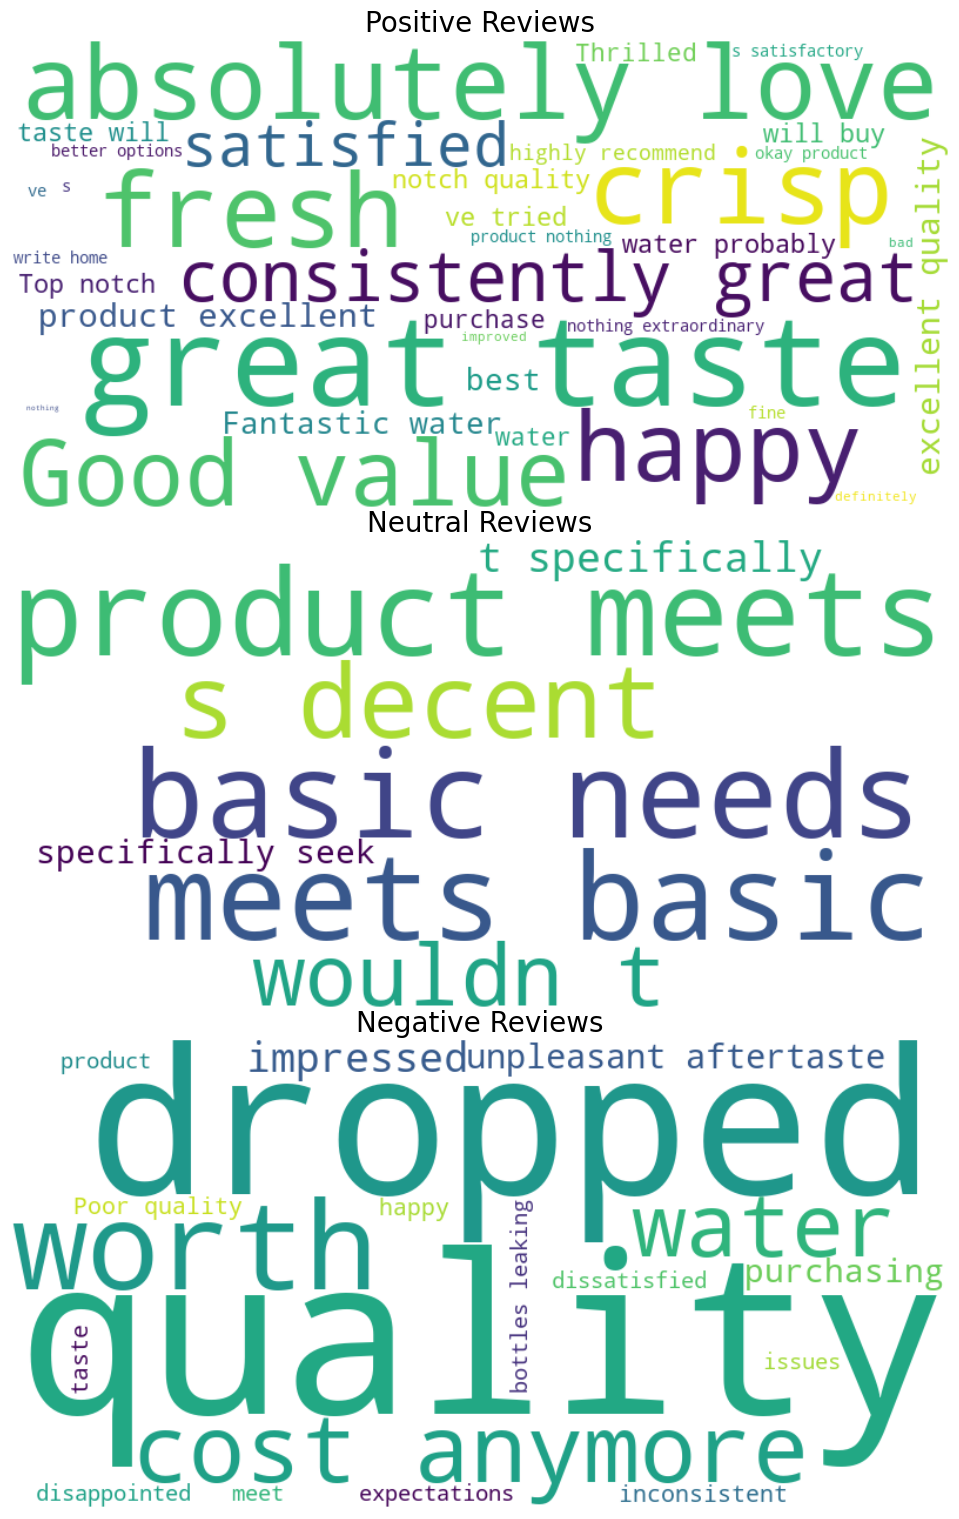

In [18]:
# Importing WordCloud for visualization
from wordcloud import WordCloud

# Separating reviews by sentiment
positive_reviews = senti_df[senti_df['sentiment'] == 'positive']['Review Text'].str.cat(sep=' ')
neutral_reviews = senti_df[senti_df['sentiment'] == 'neutral']['Review Text'].str.cat(sep=' ')
negative_reviews = senti_df[senti_df['sentiment'] == 'negative']['Review Text'].str.cat(sep=' ')

# Generating word clouds for every sentiment category
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plotting the word clouds
plt.figure(figsize=(15, 15))

# Positive Word Cloud
plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews', fontsize=20)
plt.axis('off')

# Neutral Word Cloud
plt.subplot(3, 1, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Reviews', fontsize=20)
plt.axis('off')

# Negative Word Cloud
plt.subplot(3, 1, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews', fontsize=20)
plt.axis('off')

plt.tight_layout(pad=0)
plt.show()


## Word Cloud of Customer Reviews
- Finally, a word clouds is created based on the customer reviews. A word cloud is a visual representation where the size of each word indicates how often it appears in the reviews.

- We generated separate word clouds for positive, neutral, and negative reviews. This helps us quickly see what words customers commonly use when describing the product, which can provide insights into what aspects of WaterCure they appreciate or dislike.

For example:
- In the positive reviews word cloud, you might see words like "," "absolutely thrilled," "excellent quality" appear prominently.
- In the negative reviews word cloud, words like "poor quality "," "product dropped," "dissatisfied, could be more frequent.
- In the neutral reviews, the most prominent words are "decent basic needs," and "meets basic."

These words suggest that while the product met the customers' expectations, there wasn't anything extraordinary about it. It's likely that the product performed as advertised, but it didn't impress beyond that. These word clouds give WaterPro a quick snapshot of what customers are talking about most in their feedback.

This interpretation keeps it simple and focuses on how each part of the analysis is relevant for WaterPro and their understanding of the WaterCure product sales and customer feedback.

## Conclusion:
The WaterCure product has a strong foundation of satisfied customers and performs well in the market, especially during hotter periods. However, there are opportunities to improve quality and stand out more by enhancing product features and addressing some of the negative feedback. By leveraging positive reviews, improving quality, and aligning marketing strategies with temperature trends, WaterPro can continue to grow and succeed with the WaterCure product.
